In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Read In Data

In [41]:
df_BA=pd.read_csv('BA')
df_DS=pd.read_csv('DS')
df_DA=pd.read_csv('DA')
df_DE=pd.read_csv('DE')

# Sample and Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
len(df_DS),len(df_DA),len(df_BA),len(df_DE)

(973, 1000, 1000, 1167)

In [53]:
df_DA=df_DA.sample(n=1000,replace=True)
df_BA=df_BA.sample(n=1000,replace=True)

In [54]:
len(df_DS),len(df_DA),len(df_BA),len(df_DE)

(973, 1000, 1000, 1167)

In [55]:
whole_list=[df_DA,df_DS,df_DE,df_BA]
df_whole=pd.concat(whole_list)

# Models

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
def evaluate_model(df,best,rf=False):
    df_train, df_test = train_test_split(df, test_size = 0.3)
    clean_train=df_train["clean"]
    Y_train=df_train["JT"]
    clean_test=df_test["clean"]
    Y_test=df_test["JT"]

    vectorizer = CountVectorizer().fit(df["clean"])
    clean_bow= vectorizer.transform(df["clean"])
    train_bow = vectorizer.transform(clean_train)
    test_bow = vectorizer.transform(clean_test)
    parameter=vectorizer.get_feature_names()
    
    tfidf_transformer = TfidfTransformer().fit(clean_bow)
    X_train = tfidf_transformer.transform(train_bow)
    X_test = tfidf_transformer.transform(test_bow)
    
    best.fit(X_train, Y_train)
    predictions1 = best.predict(X_test)
    print(classification_report(Y_test,predictions1))
    if rf:
        importances =best.feature_importances_
        forest_importances = pd.Series(importances,index=parameter)
        forest_importances=forest_importances.sort_values(ascending=False)[0:10]
        ax=forest_importances.plot.barh(x='lab', y='val')
        ax.invert_yaxis()
    

In [82]:
def encoding(name):
    df=df_whole.copy()
    df["NEWJT"]= np.where(df["JT"]==name,"1","0")
    df["JT"]=df["NEWJT"]
    return df

## Decision Tree

              precision    recall  f1-score   support

          BA       0.86      0.87      0.86       305
          DA       0.72      0.81      0.76       313
          DE       0.82      0.75      0.78       326
          DS       0.80      0.78      0.79       298

    accuracy                           0.80      1242
   macro avg       0.80      0.80      0.80      1242
weighted avg       0.80      0.80      0.80      1242



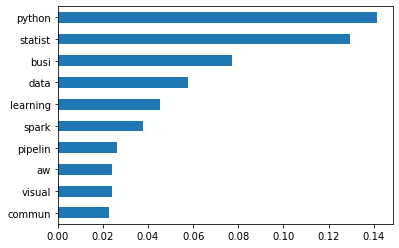

In [83]:
dtree = DecisionTreeClassifier()
evaluate_model(df_whole,dtree,rf=True)

## Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [85]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#      'n_estimators':(10, 50,100,150,200), #the number of trees
#      'max_depth':(5,10,20,30,50,80),
#      'min_samples_split': (2, 4, 8),
#      'min_samples_leaf': (4,8,12,16)
# }

# model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
# model.fit(X_train, Y_train)
# model.best_score_, model.best_params_

In [86]:
b_model = RandomForestClassifier(max_depth=20,min_samples_leaf=4,min_samples_split=8,n_estimators=200)

              precision    recall  f1-score   support

          BA       0.78      0.90      0.84       290
          DA       0.76      0.69      0.73       308
          DE       0.85      0.84      0.85       356
          DS       0.83      0.80      0.81       288

    accuracy                           0.81      1242
   macro avg       0.81      0.81      0.81      1242
weighted avg       0.81      0.81      0.81      1242



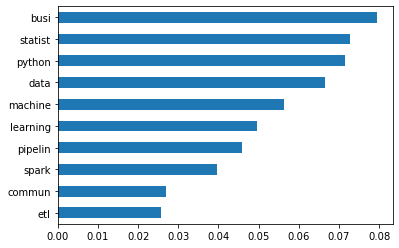

In [87]:
evaluate_model(df_whole,b_model,rf=True)

In [88]:
BA_model = encoding('BA')
DE_model = encoding('DE')
DS_model = encoding('DS')
DA_model = encoding('DA')

In [89]:
rf = RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       960
           1       0.96      0.83      0.89       282

    accuracy                           0.95      1242
   macro avg       0.96      0.91      0.93      1242
weighted avg       0.96      0.95      0.95      1242



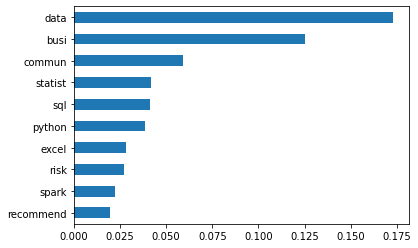

In [90]:
evaluate_model(BA_model,rf,rf=True)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       930
           1       0.86      0.71      0.78       312

    accuracy                           0.90      1242
   macro avg       0.89      0.84      0.86      1242
weighted avg       0.90      0.90      0.90      1242



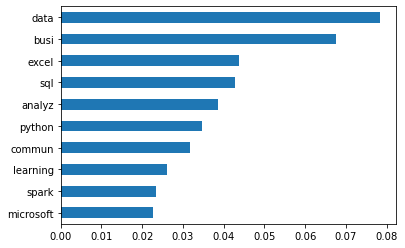

In [91]:
evaluate_model(DA_model,rf,rf=True)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       947
           1       0.92      0.73      0.82       295

    accuracy                           0.92      1242
   macro avg       0.92      0.86      0.88      1242
weighted avg       0.92      0.92      0.92      1242



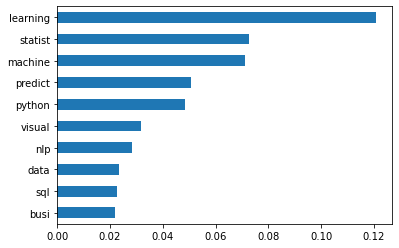

In [92]:
evaluate_model(DS_model,rf,rf=True)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       884
           1       0.91      0.75      0.82       358

    accuracy                           0.91      1242
   macro avg       0.91      0.86      0.88      1242
weighted avg       0.91      0.91      0.90      1242



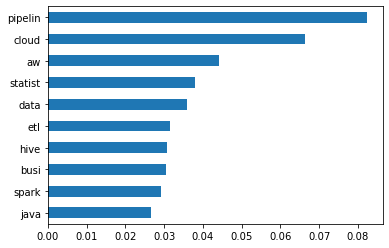

In [93]:
evaluate_model(DE_model,rf,rf=True)

## Bagging

In [94]:
from sklearn.ensemble import BaggingClassifier
# parameters = {
#      'n_estimators':(30, 50,80), #the number of trees
#      'max_samples':(20,40,60,80,100,120,150,200),
#      'max_features':(20,40,60,80,100,120,150,200),
     
# }

# model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
# model.fit(X_train, Y_train)
# model.best_score_, model.best_params_

In [30]:
bg_model=BaggingClassifier(max_features=120,max_samples=200,n_estimators=80)
evaluate_model(bg_model)

              precision    recall  f1-score   support

          BA       0.71      0.84      0.77       287
          DA       0.67      0.58      0.62       316
          DE       0.81      0.79      0.80       345
          DS       0.78      0.77      0.78       294

    accuracy                           0.75      1242
   macro avg       0.74      0.75      0.74      1242
weighted avg       0.75      0.75      0.74      1242



In [96]:
bg=BaggingClassifier()

In [98]:
evaluate_model(BA_model,bg)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       936
           1       0.90      0.85      0.87       306

    accuracy                           0.94      1242
   macro avg       0.93      0.91      0.92      1242
weighted avg       0.94      0.94      0.94      1242



In [99]:
evaluate_model(DA_model,bg)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       936
           1       0.82      0.77      0.79       306

    accuracy                           0.90      1242
   macro avg       0.87      0.86      0.86      1242
weighted avg       0.90      0.90      0.90      1242



In [ ]:
#conda install -c conda-forge skater

In [ ]:
from sklearn.pipeline import Pipeline
pipelines = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation
transfromed_x_test = vectorizer.transform(clean_train).toarray()
interpreter = Interpretation(transfromed_x_test, feature_names=vectorizer.get_feature_names())
for pipeline in pipelines:
    print('-' * 50)
    #print('Estimator: %s' % (pipeline['name']))
    
    if pipeline['name'] in ['Logistic Regression', 'Random Forest']:
        estimator = pipeline['pipeline'].steps[1][1]
    else:
        continue
        
    print(estimator)
        
    pyint_model = InMemoryModel(estimator.predict_proba, examples=transfromed_x_test)
    
    f, axes = plt.subplots(1, 1, figsize = (26, 18))
    ax = axes
    interpreter.feature_importance.plot_feature_importance(pyint_model, ascending=False, ax=ax)
    plt.show()